In [3]:
import pandas as pd

# from src.gnn_models import FastSTEPDataset
%load_ext autoreload
%autoreload 1

In [53]:
import pickle
import time

#from src.convert_graphml_to_pyg_data import *
#from src.data_loader import *
#from src.visualization import *
from tqdm import tqdm
from step3d_graph_util import *
from Node import GenericNode, FlatNode
from Node_utils import get_nodes_from_datas
#%aimport src.convert_graphml_to_pyg_data
#%aimport src.data_loader
#%aimport src.visualization

ImportError: cannot import name 'split_recursive' from 'step3d_graph_util' (C:\Users\ManhPhan.AzureAD\PycharmProjects\manufacturing-tech-gnn\step3d_graph_util.py)

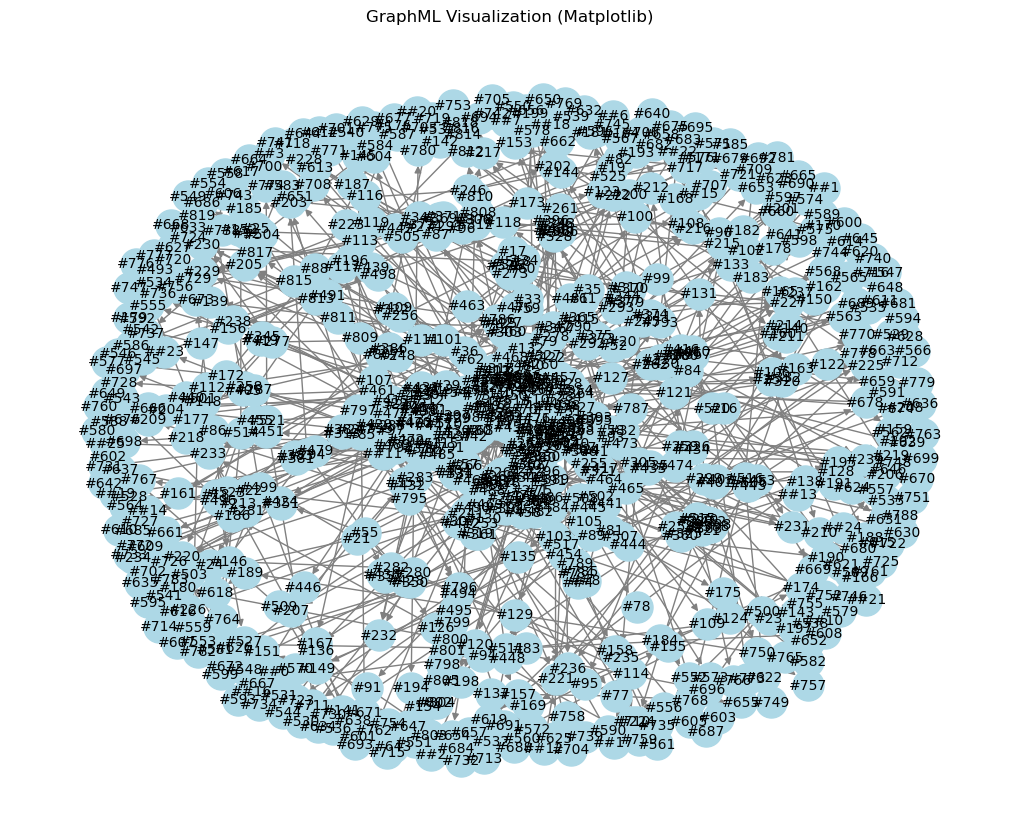

In [3]:
display_graphml_matplotlib(r"E:\gnn_data\graphml_files\23673_MakerVerse_sample.graphml")

In [32]:
data = pd.read_csv("./data/item_data.csv")
data = data_processing(data)

Created and saved new LabelEncoder.


In [38]:
data[["technology_name", "multiclass_labels"]]

,technology_name,multiclass_labels
0,FDM,5
1,MJF,11
2,CNC (Metal),2
3,CNC (Metal),2
4,CNC (Metal),2
...,...,...
64858,CNC (Metal),2
64859,CNC (Metal),2
64860,CNC (Metal),2
64861,CNC (Metal),2


In [47]:
data.head()

,item_id,faces,edges,vertices,file_name,depth,width,height,area,volume,...,bbox_volume,quantity,technology_id,material_id,post_processing_id,download_file_url,technology_name,material_name,Is_CNC,multiclass_labels
0,100033,3792.0,11286.0,7524.0,100033_Design_8.step,154.600000,66.000000,154.600000,259187.574998,854521.623711,...,1.577477e+06,1,3cbbeb15-b617-431e-84b4-d2d8fa144cf3,100,[127],https://prod-mv-user-files-upload.s3.eu-centra...,FDM,Other material (manual request),0,5
1,100034,568.0,1479.0,956.0,100034_5_77_v2.STEP,563.089004,98.888454,518.719571,796131.889763,912613.085344,...,2.888386e+07,1,bed1f100-32c8-42b2-9735-1e36286c7823,13,[74],https://prod-mv-user-files-upload.s3.eu-centra...,MJF,PA12,0,11
2,100035,216.0,637.0,423.0,100035_MakerVerse_Sample.step,163.662476,185.610681,163.662476,208702.010756,963533.514386,...,4.971657e+06,1,feb0f26f-94a5-4be2-9d40-761bb2857ab6,813,[1000],https://prod-mv-user-files-upload.s3.eu-centra...,CNC (Metal),Aluminum 6082 (3.2315),1,2
3,100036,216.0,637.0,423.0,100036_MakerVerse_Sample.step,163.662476,185.610681,163.662476,208702.010756,963533.514386,...,4.971657e+06,1,feb0f26f-94a5-4be2-9d40-761bb2857ab6,813,[1000],https://prod-mv-user-files-upload.s3.eu-centra...,CNC (Metal),Aluminum 6082 (3.2315),1,2
4,100040,216.0,637.0,423.0,100040_00048125_Stator_Pump.step,163.662476,185.610681,163.662476,208702.010756,963533.514386,...,4.971657e+06,1,feb0f26f-94a5-4be2-9d40-761bb2857ab6,813,[1000],https://prod-mv-user-files-upload.s3.eu-centra...,CNC (Metal),Aluminum 6082 (3.2315),1,2


In [48]:
le = joblib.load("./models/label_encoder.pkl")

# Show the classes in order
print(list(le.classes_))

['Binder Jetting (Metal)', 'CNC', 'CNC (Metal)', 'CNC (Polymer)', 'DLP', 'FDM', 'Injection Molding', 'LPBF', 'Laser Cutting', 'Laser Cutting (Metal)', 'Laser Cutting (Polymer)', 'MJF', 'Other Technology', 'Other Technology (Metal)', 'Other Technology (Polymer)', 'Polyjet', 'Rapid Casting', 'SLA', 'SLA (Resin)', 'SLS', 'Sheet Metal Fabrication', 'Vacuum Casting', 'WAAM']


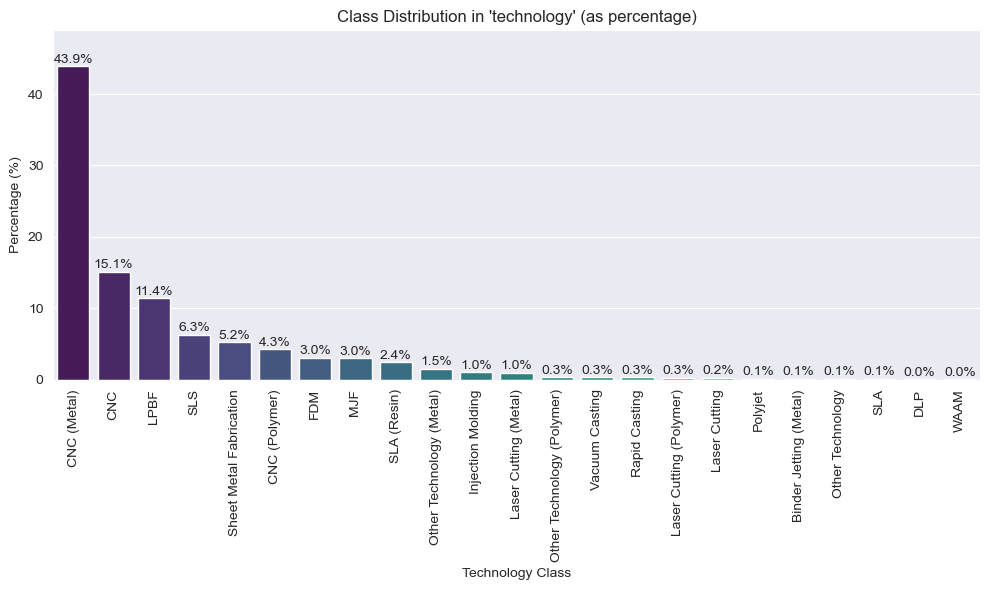

In [52]:
plot_class_distribution(data)

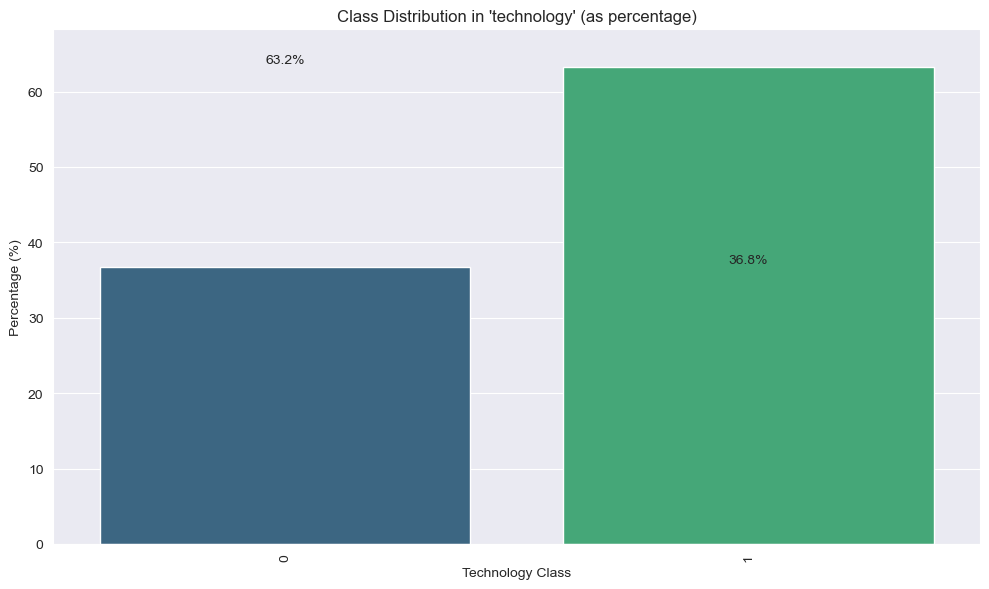

In [41]:
plot_class_distribution(data, target_col="Is_CNC")

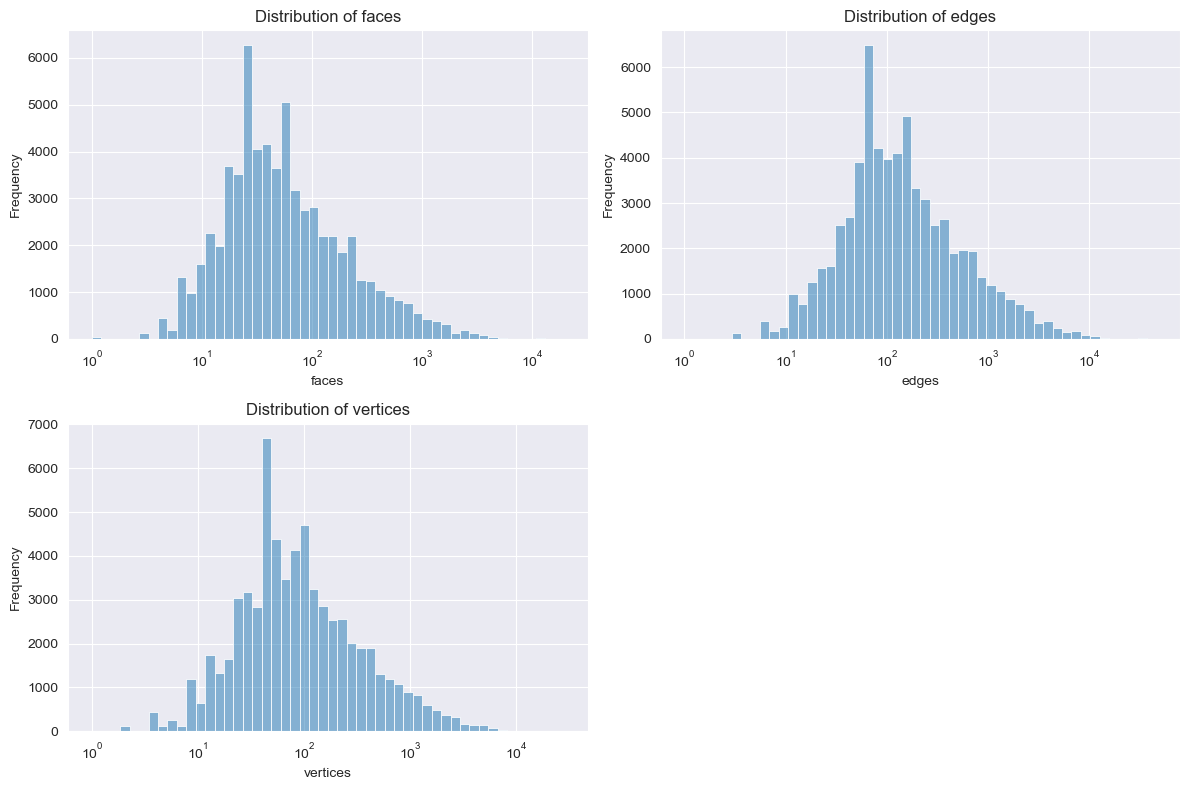

In [58]:
plot_topological_features_distribution(data, ["faces", "edges", "vertices"])

In [126]:
sync_dataset = pd.read_csv("./data/synced_dataset.csv")
sync_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62671 entries, 0 to 62670
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   item_id             62671 non-null  int64  
 1   faces               62671 non-null  float64
 2   edges               62671 non-null  float64
 3   vertices            62671 non-null  float64
 4   file_name           62671 non-null  object 
 5   depth               62671 non-null  float64
 6   width               62671 non-null  float64
 7   height              62671 non-null  float64
 8   area                62671 non-null  float64
 9   volume              62671 non-null  float64
 10  bbox_depth          62671 non-null  float64
 11  bbox_height         62671 non-null  float64
 12  bbox_width          62671 non-null  float64
 13  bbox_area           62671 non-null  float64
 14  bbox_volume         62671 non-null  float64
 15  quantity            62671 non-null  int64  
 16  tech

In [98]:
graphml_path = r"E:\gnn_data\graphml_files\72141_Nexo_BlockingTool.graphml"
G = nx.read_graphml(graphml_path)

In [99]:
G.number_of_nodes(), G.number_of_edges()

(173, 182)

In [100]:
all_attribute_type = set()
for node, attrs in (G.nodes(data=True)):
    all_attribute_type.add(attrs["type"])
all_attribute_type

{'ADVANCED_BREP_SHAPE_REPRESENTATION',
 'ADVANCED_FACE',
 'APPLICATION_CONTEXT',
 'APPLICATION_PROTOCOL_DEFINITION',
 'AXIS2_PLACEMENT_3D',
 'CARTESIAN_POINT',
 'CIRCLE',
 'CLOSED_SHELL',
 'COLOUR_RGB',
 'COMPOSED_CONVERSION_BASED_UNIT',
 'COMPOSED_GEOMETRIC_REPRESENTATION_CONTEXT',
 'COMPOSED_LENGTH_UNIT',
 'COMPOSED_NAMED_UNIT',
 'CONICAL_SURFACE',
 'CONVERSION_BASED_UNIT',
 'CYLINDRICAL_SURFACE',
 'DIMENSIONAL_EXPONENTS',
 'DIRECTION',
 'EDGE_CURVE',
 'EDGE_LOOP',
 'FACE_BOUND',
 'FILL_AREA_STYLE',
 'FILL_AREA_STYLE_COLOUR',
 'GEOMETRIC_REPRESENTATION_CONTEXT',
 'GLOBAL_UNCERTAINTY_ASSIGNED_CONTEXT',
 'GLOBAL_UNIT_ASSIGNED_CONTEXT',
 'LENGTH_UNIT',
 'MANIFOLD_SOLID_BREP',
 'MECHANICAL_DESIGN_GEOMETRIC_PRESENTATION_REPRESENTATION',
 'NAMED_UNIT',
 'ORIENTED_EDGE',
 'PLANE',
 'PLANE_ANGLE_MEASURE_WITH_UNIT',
 'PLANE_ANGLE_UNIT',
 'PRESENTATION_LAYER_ASSIGNMENT',
 'PRESENTATION_STYLE_ASSIGNMENT',
 'PRODUCT',
 'PRODUCT_CONTEXT',
 'PRODUCT_DEFINITION',
 'PRODUCT_DEFINITION_CONTEXT',
 'PR

In [102]:
for node, attrs in list((G.nodes(data=True)))[:20]:
    print(node)
    print(attrs)
    print(G.degree(node))
    for key, value in attrs.items():
        print(key, value)
    print("-------------------------------------------------")

#10
{'type': 'SHAPE_REPRESENTATION_RELATIONSHIP', 'SHAPE_REPRESENTATION_RELATIONSHIP_0': 'None', 'SHAPE_REPRESENTATION_RELATIONSHIP_1': 'relationship between Nexo_BlockingTool-None and Nexo_BlockingTool-None'}
2
type SHAPE_REPRESENTATION_RELATIONSHIP
SHAPE_REPRESENTATION_RELATIONSHIP_0 None
SHAPE_REPRESENTATION_RELATIONSHIP_1 relationship between Nexo_BlockingTool-None and Nexo_BlockingTool-None
-------------------------------------------------
#11
{'type': 'ADVANCED_BREP_SHAPE_REPRESENTATION', 'ADVANCED_BREP_SHAPE_REPRESENTATION_0': 'Nexo_BlockingTool-None'}
3
type ADVANCED_BREP_SHAPE_REPRESENTATION
ADVANCED_BREP_SHAPE_REPRESENTATION_0 Nexo_BlockingTool-None
-------------------------------------------------
#12
{'type': 'SHAPE_DEFINITION_REPRESENTATION'}
2
type SHAPE_DEFINITION_REPRESENTATION
-------------------------------------------------
#13
{'type': 'PRODUCT_DEFINITION_SHAPE', 'PRODUCT_DEFINITION_SHAPE_0': '', 'PRODUCT_DEFINITION_SHAPE_1': ''}
2
type PRODUCT_DEFINITION_SHAPE
PROD

In [103]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
page_rank = nx.pagerank(G)
average_neighbor_degree = nx.average_neighbor_degree(G)

In [120]:
df = pd.DataFrame([degree_centrality, betweenness_centrality, closeness_centrality, page_rank, average_neighbor_degree]).T
df.columns = ["degree_centrality", "betweenness_centrality", "closeness_centrality", "page_rank", "average_neighbor_degree"]
df

,degree_centrality,betweenness_centrality,closeness_centrality,page_rank,average_neighbor_degree
#10,0.011628,0.000000,0.000000,0.002402,2.0
#11,0.017442,0.004556,0.005814,0.003423,2.5
#12,0.011628,0.000000,0.000000,0.002402,1.5
#13,0.011628,0.000204,0.005814,0.003423,2.0
#14,0.017442,0.000340,0.007752,0.005311,1.0
...,...,...,...,...,...
#165,0.023256,0.001020,0.012370,0.006893,0.0
##13,0.005814,0.000000,0.017618,0.004755,0.0
##14,0.005814,0.000000,0.017618,0.004755,0.0
##15,0.005814,0.000000,0.017618,0.004755,0.0


In [121]:
for node in tqdm(list(G.nodes(data=True))[:5]):
    print(node[0], node[1]["type"], degree_centrality[node[0]])

100%|██████████| 5/5 [00:00<?, ?it/s]

#10 SHAPE_REPRESENTATION_RELATIONSHIP 0.011627906976744186
#11 ADVANCED_BREP_SHAPE_REPRESENTATION 0.01744186046511628
#12 SHAPE_DEFINITION_REPRESENTATION 0.011627906976744186
#13 PRODUCT_DEFINITION_SHAPE 0.011627906976744186
#14 PRODUCT_DEFINITION 0.01744186046511628


In [91]:
with open("all_attribute_type.pkl", "rb") as f:
    all_attribute_type = sorted(list(pickle.load(f)))
node_type_to_index = {node_type: idx for idx, node_type in enumerate(all_attribute_type)}
node_type_to_index

{'': 0,
 'A2PL3D': 1,
 'ABSR': 2,
 'ADVANCED_BREP_SHAPE_REPRESENTATION': 3,
 'ADVANCED_FACE': 4,
 'ADVFC': 5,
 'ANGULAR_DIMENSION': 6,
 'ANNOTATION_CURVE_OCCURRENCE': 7,
 'ANNOTATION_FILL_AREA': 8,
 'ANNOTATION_FILL_AREA_OCCURRENCE': 9,
 'ANNOTATION_OCCURRENCE': 10,
 'ANNOTATION_OCCURRENCE_ASSOCIATIVITY': 11,
 'ANNOTATION_PLANE': 12,
 'ANNOTATION_SYMBOL_OCCURRENCE': 13,
 'ANNOTATION_TEXT_OCCURRENCE': 14,
 'APPCNT': 15,
 'APPLICATION_CONTEXT': 16,
 'APPLICATION_PROTOCOL_DEFINITION': 17,
 'APPLIED_APPROVAL_ASSIGNMENT': 18,
 'APPLIED_DATE_AND_TIME_ASSIGNMENT': 19,
 'APPLIED_DOCUMENT_REFERENCE': 20,
 'APPLIED_EXTERNAL_IDENTIFICATION_ASSIGNMENT': 21,
 'APPLIED_GROUP_ASSIGNMENT': 22,
 'APPLIED_PERSON_AND_ORGANIZATION_ASSIGNMENT': 23,
 'APPLIED_PRESENTED_ITEM': 24,
 'APPLIED_SECURITY_CLASSIFICATION_ASSIGNMENT': 25,
 'APPRDF': 26,
 'APPROVAL': 27,
 'APPROVAL_DATE_TIME': 28,
 'APPROVAL_PERSON_ORGANIZATION': 29,
 'APPROVAL_ROLE': 30,
 'APPROVAL_STATUS': 31,
 'AREA_IN_SET': 32,
 'AREA_UNIT': 33,


In [129]:
sync_dataset[sync_dataset.file_name.str.startswith("72141")].is_cnc

45620    1
Name: is_cnc, dtype: int64

In [137]:
pyg_dat_test = enhanced_convert_graph(G, 1, node_type_to_index)

Node features shape: torch.Size([173, 70])
Edge index shape: torch.Size([2, 364])


In [153]:
df_columns = ["node_degree", "degree_centrality", "betweenness_centrality", "closeness_centrality", "page_rank", "average_neighbor_degree"]
df_columns.extend([f"node_type_dim_{i}" for i in range(64)])
df = pd.DataFrame(pyg_dat_test.x)
df.columns = df_columns
df.describe()

,node_degree,degree_centrality,betweenness_centrality,closeness_centrality,page_rank,average_neighbor_degree,node_type_dim_0,node_type_dim_1,node_type_dim_2,node_type_dim_3,...,node_type_dim_54,node_type_dim_55,node_type_dim_56,node_type_dim_57,node_type_dim_58,node_type_dim_59,node_type_dim_60,node_type_dim_61,node_type_dim_62,node_type_dim_63
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,2.104046,0.012233,0.001309,0.013528,0.005780,0.827553,0.161537,0.368024,-0.291290,0.064245,...,0.246437,0.142797,0.096463,-0.028097,0.175961,0.191947,0.419053,-0.329644,0.225333,-0.227323
std,1.201083,0.006983,0.002622,0.003847,0.002760,1.072154,0.890551,1.147599,0.896659,1.115745,...,0.827240,1.228555,1.035355,1.241142,0.796555,0.784590,1.133101,0.803638,0.890275,0.878037
min,1.000000,0.005814,0.000000,0.000000,0.002402,0.000000,-1.850881,-2.952348,-2.163745,-1.959623,...,-1.821168,-2.780647,-1.949102,-1.866277,-2.323611,-2.016031,-2.074638,-1.958966,-1.699562,-1.886758
25%,1.000000,0.005814,0.000000,0.012370,0.003627,0.000000,-0.297804,-0.131156,-1.092554,-0.910925,...,-0.452303,-0.622977,-0.763039,-0.685601,-0.253711,-0.359555,-0.284802,-0.843228,-0.367861,-0.841161
50%,2.000000,0.011628,0.000544,0.013289,0.005110,0.000000,-0.018960,0.266636,-0.650268,-0.069155,...,0.140494,-0.045754,0.254628,-0.170295,0.268398,0.051156,0.427998,-0.214336,0.108194,-0.278410
75%,2.000000,0.011628,0.001768,0.015830,0.006921,1.000000,0.993236,1.068640,-0.051368,1.086752,...,0.707976,0.887154,0.947492,0.797331,0.757007,0.438809,0.768934,0.172914,0.947242,-0.050144
max,7.000000,0.040698,0.024480,0.023547,0.016516,6.000000,2.618952,2.068998,1.782249,1.753656,...,1.888422,2.567972,2.632857,3.724926,1.579605,3.000477,3.104257,2.673569,3.343767,2.435170


In [14]:
G2 = nx.read_graphml(r"E:\gnn_data\graphml_files\23580_006_TopCoverRFID_Magnelis_3mm_test.graphml")

In [15]:
G2.number_of_nodes(), G2.number_of_edges()

(867, 39)

In [170]:
pyg_dat_test_2 = enhanced_convert_graph(G2, 1, node_type_to_index)

Graph has 144713 nodes
Start calculating raw features...
Finished calculating raw features


100%|██████████| 144713/144713 [00:02<00:00, 66028.45it/s]


Node features shape: torch.Size([144713, 70])
Edge index shape: torch.Size([2, 329366])


In [13]:
pyg_dat_test_2 = torch.load(r"E:\gnn_data\processed_step_data_full_node_features\23580_006_TopCoverRFID_Magnelis_3mm_test.pt", weights_only=False)
pyg_dat_test_2.y

tensor([1])

In [1]:
step_path = r"C:\step_files\23534_S06011E.STEP"

In [30]:
list1 = [0]
list2 = list1.copy()
list1.clear()
list2

[0]

In [39]:
datas = []
with open(step_path) as file:
    data_started = False
    for line in file.readlines():
        if line.startswith("DATA"):
            data_started = True
            continue
        if data_started:
            if line and not line.startswith("ENDSEC"):
                datas.append(line.strip().replace("'", ""))
            else:
                break

In [48]:
for line in datas:
    id_type_arguments = line.split("=")
    id_ = id_type_arguments[0].strip()
    type_argument = id_type_arguments[1].strip()
    print(type_argument)
    break

PERSON_AND_ORGANIZATION ( #20, #26 ) ;


In [35]:
def parse_file(file_name):
    with open(file_name) as f:
        data = f.read()
        data = data.replace("\n","")
        data = data.replace("\'",'')
        datas = data.split(";")
    headers = []
    start_data = 0
    for i, line in enumerate(datas):
        if line != 'DATA':
            headers.append(line)
        else:
            start_data = i + 1
            break
    for i in range(0, start_data):
        datas.pop(0)

    return headers, datas
all_flat_nodes, fast_dict_search = get_nodes_from_data(datas)

In [36]:
_, data_part = parse_file(step_path)

In [37]:
data_part

['#1 = PERSON_AND_ORGANIZATION ( #20, #26 ) ',
 '#2 = PERSON_AND_ORGANIZATION ( #20, #26 ) ',
 '#3 = DATE_AND_TIME ( #12, #36 ) ',
 '#4 = APPROVAL_PERSON_ORGANIZATION ( #30, #16, #17 ) ',
 '#5 = APPROVAL_PERSON_ORGANIZATION ( #2, #44, #45 ) ',
 '#6 = PERSON_AND_ORGANIZATION_ROLE ( design_owner ) ',
 '#7 = PERSON_AND_ORGANIZATION ( #20, #26 ) ',
 '#8 = CC_DESIGN_PERSON_AND_ORGANIZATION_ASSIGNMENT ( #70, #35, ( #33 ) ) ',
 '#9 = MECHANICAL_CONTEXT ( NONE, #46, mechanical ) ',
 '#10 = COORDINATED_UNIVERSAL_TIME_OFFSET ( 1, 0, .AHEAD. ) ',
 '#11 = DATE_AND_TIME ( #24, #62 ) ',
 '#12 = CALENDAR_DATE ( 2023, 27, 9 ) ',
 '#13 = DATE_AND_TIME ( #71, #59 ) ',
 '#14 = CC_DESIGN_APPROVAL ( #44, ( #28 ) ) ',
 '#15 = APPROVAL_STATUS ( not_yet_approved ) ',
 '#16 = APPROVAL ( #53, UNSPECIFIED ) ',
 '#17 = APPROVAL_ROLE (  ) ',
 '#18 = PERSON_AND_ORGANIZATION ( #20, #26 ) ',
 '#19 = APPROVAL_ROLE (  ) ',
 '#20 = PERSON ( UNSPECIFIED, UNSPECIFIED, UNSPECIFIED, (UNSPECIFIED), (UNSPECIFIED), (UNSPECIFIE